In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [114]:
data = pd.read_csv('ai4i2020.csv')

In [127]:
data.head(20)

,Type,Air temperature _K_,Process temperature _K_,Rotational speed _rpm_,Torque _Nm_,Tool wear _min_,Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
5,M,298.1,308.6,1425,41.9,11,0
6,L,298.1,308.6,1558,42.4,14,0
7,L,298.1,308.6,1527,40.2,16,0
8,M,298.3,308.7,1667,28.6,18,0
9,M,298.5,309.0,1741,28.0,21,0


In [116]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [117]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [118]:
print(data.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [119]:
data.shape

(10000, 14)

In [120]:
# Check for duplicates across all columns
duplicates_all_columns = data[data.duplicated()]

In [121]:
print("Duplicates across all columns:")
print(duplicates_all_columns)

Duplicates across all columns:
Empty DataFrame
Columns: [UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, RNF]
Index: []


In [122]:
data.drop(["UDI", "Product ID","RNF","OSF","PWF","HDF","TWF"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [123]:
data.columns = data.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

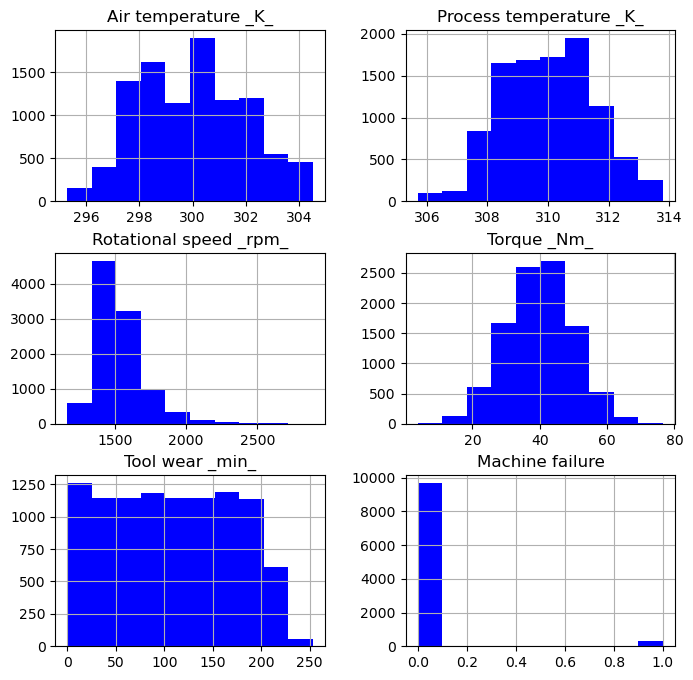

In [126]:
#explore targeted classes
fig=data.hist(figsize=(8,8),color = 'blue')
plt.savefig('plot.png')
plt.show()


In [128]:
# Handle Categorical Variables
data = pd.get_dummies(data, columns=['Type'], drop_first=False)


In [129]:
# Creating an interaction feature
data['Temperature Interaction'] = data['Air temperature _K_'] * data['Process temperature _K_']

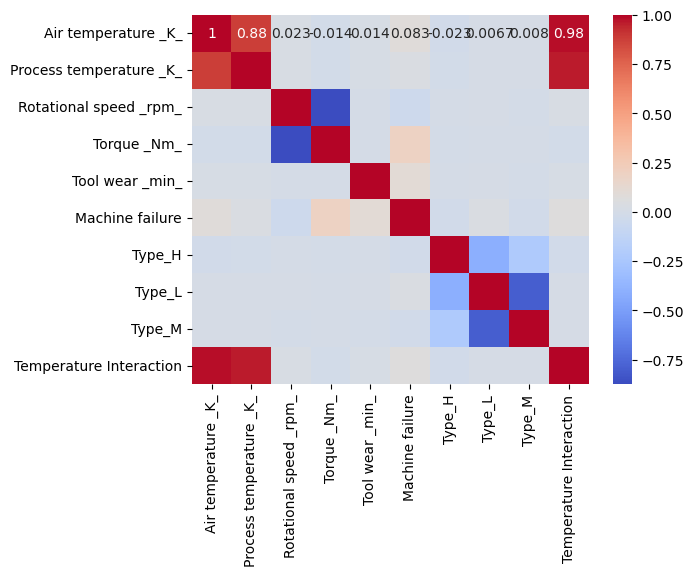

In [130]:
# Feature Engineering
#  Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.savefig('plot.png')
plt.show()

In [131]:
#Scale Features
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['Air temperature _K_', 'Process temperature _K_', 'Rotational speed _rpm_', 'Torque _Nm_', 'Tool wear _min_']

scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])


In [132]:
model = XGBClassifier() 
# Train-Test Split
X = data.drop(['Machine failure'], axis=1)
y = data['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model.fit(X_train, y_train)

C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\Ha

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [134]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


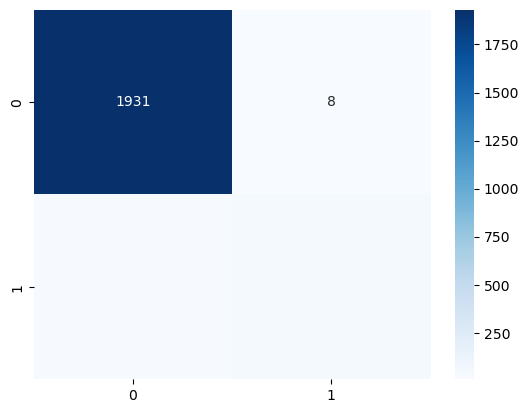

In [135]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.savefig('plot.png')
plt.show()

In [136]:
# Interpret Results
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
Torque _Nm_                0.190228
Air temperature _K_        0.173530
Process temperature _K_    0.149911
Tool wear _min_            0.133607
Rotational speed _rpm_     0.126586
Type_L                     0.120602
Type_M                     0.044673
Temperature Interaction    0.041265
Type_H                     0.019599
dtype: float32


C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\Hager\anaconda3\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


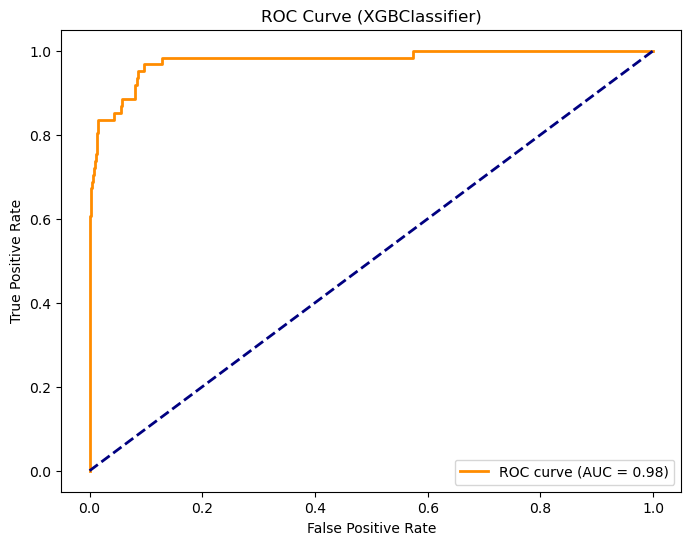

In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBClassifier)')
plt.legend(loc='lower right')
plt.savefig('plot.png')

plt.show()

In [138]:
#Random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.88      0.59      0.71        61

    accuracy                           0.98      2000
   macro avg       0.93      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



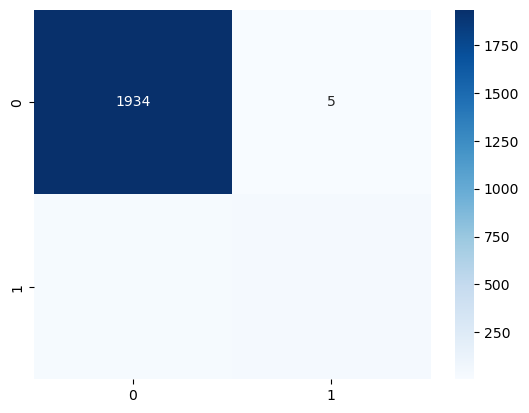

In [139]:


y_true = y_test
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.savefig('plot.png')
plt.show()

In [140]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
Torque _Nm_                0.190228
Air temperature _K_        0.173530
Process temperature _K_    0.149911
Tool wear _min_            0.133607
Rotational speed _rpm_     0.126586
Type_L                     0.120602
Type_M                     0.044673
Temperature Interaction    0.041265
Type_H                     0.019599
dtype: float32


In [141]:
# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

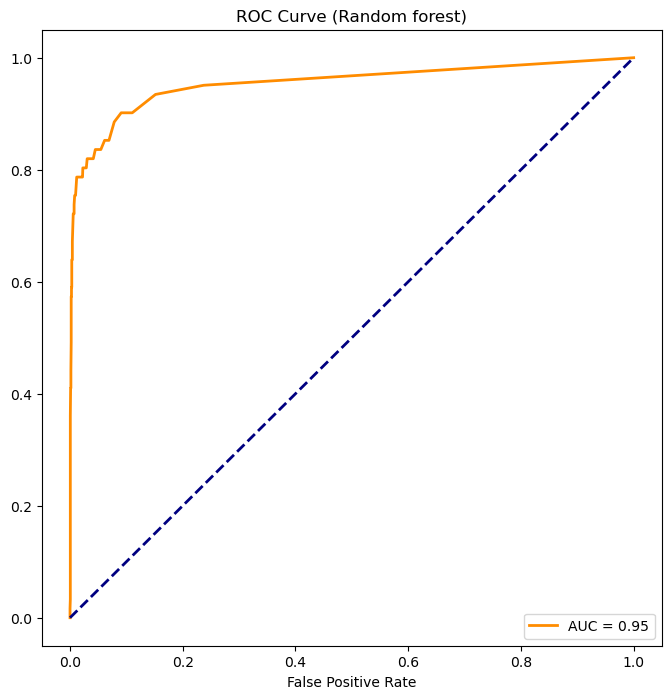

In [147]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve (Random forest)')
plt.legend(loc='lower right')
plt.savefig('plot.png')

In [143]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1, random_state=42)


svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.9695
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



C:\Users\Hager\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hager\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hager\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
Torque _Nm_                0.190228
Air temperature _K_        0.173530
Process temperature _K_    0.149911
Tool wear _min_            0.133607
Rotational speed _rpm_     0.126586
Type_L                     0.120602
Type_M                     0.044673
Temperature Interaction    0.041265
Type_H                     0.019599
dtype: float32


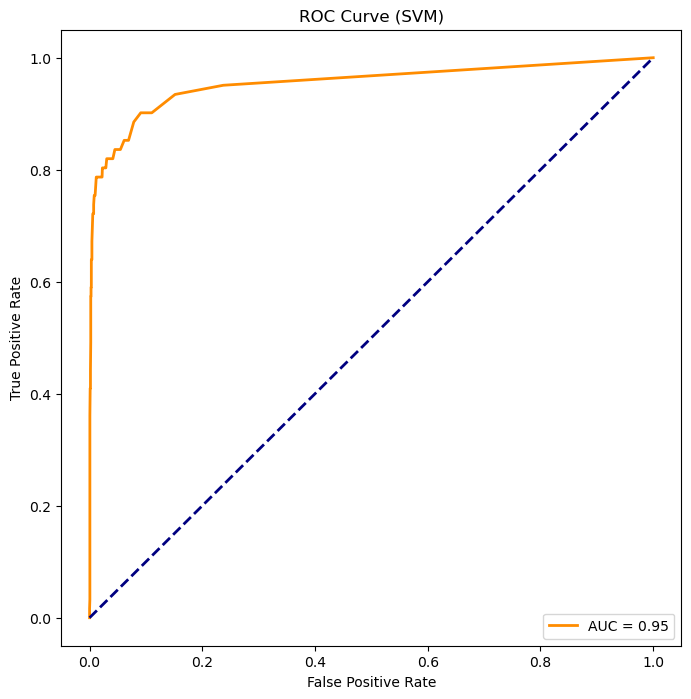

In [145]:


# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc='lower right')
plt.savefig('plot.png')
plt.show()